# An Analysis of the #FeesMustFall Movement through Twitter Data

It is necessary to install _jupyter_contrib_nbextensions_ to view the included table of contents. This makes navigation across the notebook easier.  

Installation instructions can be found in the official [GitHub Repo.](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-Analysis-of-the-#FeesMustFall-Movement-through-Twitter-Data" data-toc-modified-id="An-Analysis-of-the-#FeesMustFall-Movement-through-Twitter-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An Analysis of the #FeesMustFall Movement through Twitter Data</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objectives-DEFINE-RESEARCH-QUESTION-BETTER" data-toc-modified-id="Objectives-DEFINE-RESEARCH-QUESTION-BETTER-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Objectives DEFINE RESEARCH QUESTION BETTER</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Scraping-the-data" data-toc-modified-id="Scraping-the-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Scraping the data</a></span><ul class="toc-item"><li><span><a href="#Core-data-(using-the-command-line)" data-toc-modified-id="Core-data-(using-the-command-line)-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Core data (using the command line)</a></span></li><li><span><a href="#Benchmark/auxiliary-data-(using-the-Twitter-API)" data-toc-modified-id="Benchmark/auxiliary-data-(using-the-Twitter-API)-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Benchmark/auxiliary data (using the Twitter API)</a></span></li></ul></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Cleaning the data</a></span><ul class="toc-item"><li><span><a href="#Core-data" data-toc-modified-id="Core-data-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Core data</a></span></li><li><span><a href="#Benchmark-data" data-toc-modified-id="Benchmark-data-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Benchmark data</a></span></li><li><span><a href="#Network-data" data-toc-modified-id="Network-data-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>Network data</a></span></li></ul></li><li><span><a href="#Validate-data-quality" data-toc-modified-id="Validate-data-quality-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Validate data quality</a></span></li></ul></li><li><span><a href="#Data-Visualisation" data-toc-modified-id="Data-Visualisation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Visualisation</a></span><ul class="toc-item"><li><span><a href="#Unfolding-of-events" data-toc-modified-id="Unfolding-of-events-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Unfolding of events</a></span></li><li><span><a href="#Twitter-as-a-tool-to-mobilise-protestors" data-toc-modified-id="Twitter-as-a-tool-to-mobilise-protestors-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Twitter as a tool to mobilise protestors</a></span></li><li><span><a href="#Network-analysis" data-toc-modified-id="Network-analysis-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Network analysis</a></span></li><li><span><a href="#Analyse-hashtags-in-text" data-toc-modified-id="Analyse-hashtags-in-text-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Analyse hashtags in text</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Positive-externalities/side-achievements" data-toc-modified-id="Positive-externalities/side-achievements-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Positive externalities/side achievements</a></span></li></ul></li></ul></li></ul></div>

In [3]:
# Import necessary modules
# Some of the these modules will require installation from the command line (e.g. dash)

import numpy as np
import pandas as pd
import glob
import datetime as dt
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import time
import random
import json
import tweepy
import pickle
import csv
import networkx as nx
from scipy import stats
from operator import itemgetter
from IPython.display import display, HTML
from IPython.display import Image
import dash
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# Allows side by side dataframe/images in the specified cell
CSS = """
div.cell:nth-child(8) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Introduction 

#FeesMustFall is a South African student-led protest movement born out of the excessively high tuition fees relative to average national income, making higher education inaccessible for most of the population. 

During my first year of university in Cape Town, I distinctly remember the sound of gunshots and stun grenades from outside the doors of our residence hall. These were the measures taken by the South African Police Force (SAPS) to control increasingly violent protests.

The protests began in mid-October 2015 and focused on attaining two primary goals:
1. Abolish annual increases in tertiary tuition fees
2. Increase government funding of universities.

Protests started at the University of Witwatersrand and spread to the University of Cape Town and Rhodes University. Within several weeks, protests were country-wide ultimately resulting in a national education crisis with an estimated total cost of $44,25 million, just in property damage. Images of protests at two universities during the crisis are included below.

Having lived among the leaders of the #FeesMustFall movement in Leo Marquard Hall, I recall Twitter playing a major role in mobilising the youth and co-ordinating protests. This notebook provides further insight into the extent to which Twitter was successfully utilised to increase protest support. Moreover, influential users and __several other things__ are also explored. There will be 3 main topics addressed: SUMMARISE OBJECTIVES BELOW
AND SUMMARISE PROPOSED RESEARCH QUESTION HERE 

NB from CHENGchuns' email: When you work on the final project, think about you are telling a story based on your data. Please state your objective and research question up front (a little bit motivation would be better, but not required). 

University of Cape Town    | Wits University
:-------------------------:|:-------------------------:
<img src="images/paint.jpg" width="490" height="400"/>  |  <img src="images/fees-must-fall-4.jpg" width="630" height="450"/>
<img src="images/http---com.ft.imagepublish.prod.s3.amazonaws.com-231fbbce-8caa-11e6-8cb7-e7ada1d123b1.jpg" width="670" height="480"/>|<img src="images/fees-must-faa-3.jpg" width="460" height="450"/>



## Objectives DEFINE RESEARCH QUESTION BETTER
1. Provide insight into the volume of tweets with the #FeesMustFall tag over time. Gain a deeper understanding on how the movement gained traction over time by linking tweet volume to significant events. Conclude whether the platform was effective in mobilising protestors (MAYBE LEAVE OUT LAST SENTENCE.)
2. Examine the network of tweeters and clusters underlying the core data. Identify key participants, their links and their influence on the movement.
3. Machine learning - subjacent issues via hashtag analysis lead into next steps. POTENTIALLY CONSIDER CURRENT FEESMUSTFALL TWEETS AS A SUBJACENT ISSUE (I.E. FEESMUSTFALL IN INDIA) (or elsewhere) - using Twitter data as a metric for pre-empting similar movements using the SA example as a benchmark.
4. Next steps: identify research to follow this notebook NB RAPE PROBLEM IN SA AND WHETHER SIMILAR LINKS BETWEEN UYINENE AND FEESMUSTFALL EXIST 




1. Potentially older tweets before the movement started, why these failed and why the 2015 ones actually sparked the protest
2. Identify influential Twitter users and determine if a relationship exists between better Twitter activity and standing in the movement

## Dataset

The data to be analysed in this notebook is drawn from two sources:

1. __Core data:__  consists of tweets that contain the tag #FeesMustFall taken from the period __21/03/2015 - 31/10/2016.__
2. __Benchmark data:__ consists of tweets (from __01/02/2017 onwards__) from users who posted at least once with the #FeesMustFall tag.

The table below contains summary statistics of the core and benchmark data, obtained after the cleaning phase.

| Dataset | Tweet count (before clean) | Tweet count (after clean) | Variable 1| Variable 2| Variable 3| Variable 4| Variable 5| Variable 6| Variable 7|
| ------------------- | ------------- | ----------------------- | ---|---|---|---|---|---|---|
| Core   | 447204 |352841       |  date	|username	|replies |retweets|	favorites|	text|	mentions|	hashtags|	permalink  
| Benchmark  | 112223    |    27342 |created_at	|text	|favorites	|retweets|	in_reply_to




The table and boxplot below highlight key descriptive statistics of the core data, obtained after the cleaning phase. Statistics are shown for replies, retweets and favourites (collectively referred to as types of engagment). It is clear that while most of the data lies between 0 and 2, there are several outliers with extremely large engagement counts

Replies       Retweets     Favourites
Tweet Count           352841.000000  352841.000000  352841.000000
Average                    0.206495       2.803835       1.112705
Standard Deviation         1.314331      22.449769      19.909709
Min value                  0.000000       0.000000       0.000000
Lower Quartile (25%)       0.000000       0.000000       0.000000
Median (50%)               0.000000       0.000000       0.000000
Upper Quartile (75%)       0.000000       1.000000       1.000000
Max value                175.000000    3626.000000    8311.000000

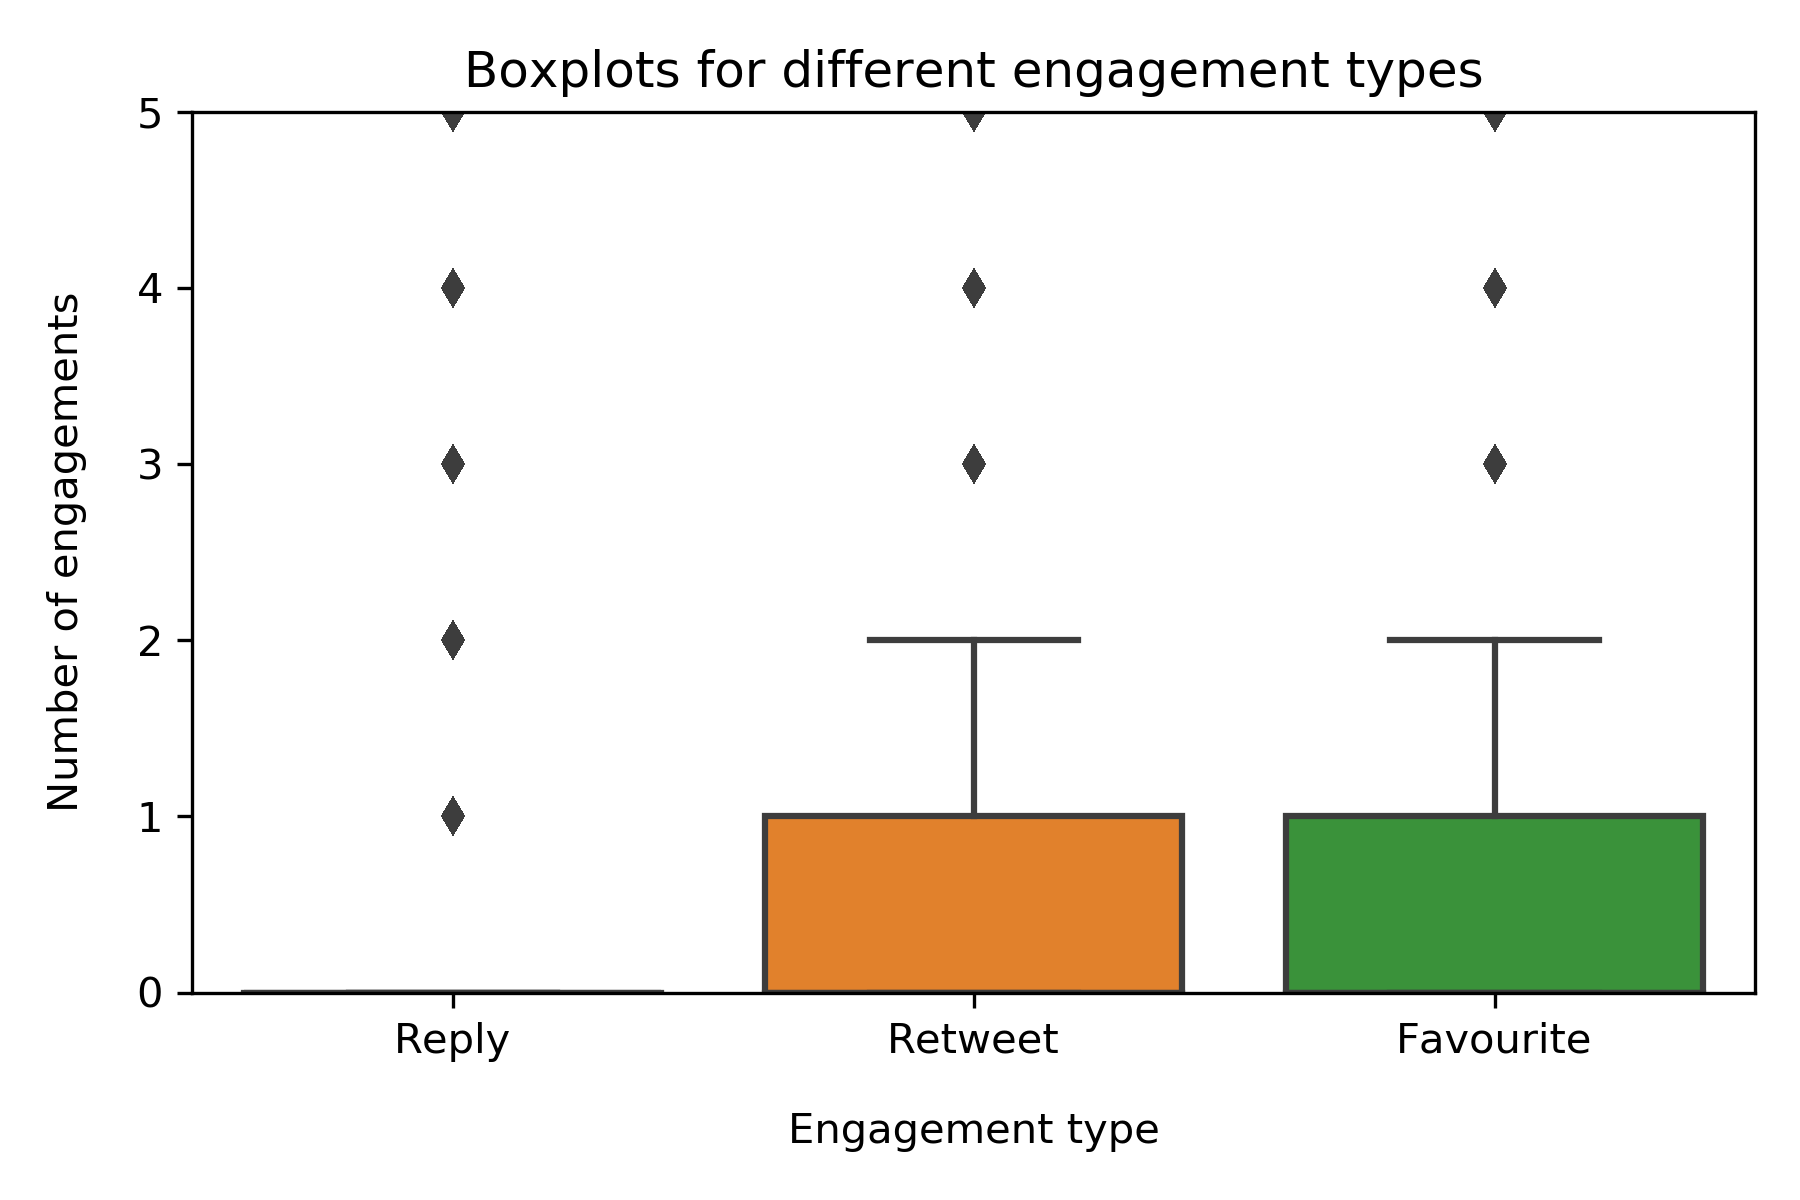

In [4]:
sum_stats = pd.read_pickle('pickle_files/sum_stats')
display(sum_stats)
Image(filename='images/summary_boxplot.png') 

### Scraping the data 

#### Core data (using the command line)
Twitter have restricted free developer accounts from accessing tweets (by text and tags) further than 7 days in the past. Moreover, the paid API service limits users to 100 daily tweets. These limitations are significant when attempting to perform analysis on more than 350000 tweets. For this reason, alternative scraping methods were utilised to obtain the core data. Marquisvictor's [GetOldTweets repository](https://github.com/marquisvictor/Optimized-Modified-GetOldTweets3-OMGOT) is used as an aid to scrape all tweets from the command line. In essence, this algorithm automates manual scrolling through Twitter. Given the required information, it scrapes Twitter data and metadata directly from the browser.

After installing the relevant packages, all tweets with the #FeesMustFall tag are saved into a csv file. Varying periods are used for each csv file to ensure that the scrape is not large enough to lead to a termination of the request. This procedure is carried out as indicated in the image below. Scraping the entire date range took approximately 21 hours.

![Method used to scrape all historical tweets](images/scrape_data.png "Scrape")



In [5]:
# Read core data into memory from the scraped csv files

path = r'/Users/gregmeyer/Desktop/LSE/ST445/2019mt-st445-project-GregAdamMeyer' 
all_files = glob.glob(path + "/*.csv")

csv_li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    csv_li.append(df)

df = pd.concat(csv_li, axis=0, ignore_index=False)
df.head(3)

date     username   to  replies  retweets  favorites  \
0  31/10/2016 23:42  LesIzmoreKC  NaN        0         1          0   
1  31/10/2016 23:40   SupremeCFC  NaN        2         0          1   
2  31/10/2016 23:40    camaripop  NaN        0         0          0   

                                                text  geo      mentions  \
0  Seven university protests around the world tha...  NaN  @thedailyvox   
1  So now at CUT every student qualifies to write...  NaN           NaN   
2  Thought Factory: #FeesMustFall: So Why Shutdow...  NaN           NaN   

                                            hashtags            id  \
0                                      #FeesMustFall  7.930000e+17   
1                                      #FeesMustFall  7.930000e+17   
2  #FeesMustFall #SouthAfrica #BLM #leadership #i...  7.930000e+17   

                                           permalink  
0  https://twitter.com/LesIzmoreKC/status/7932366...  
1  https://twitter.com/SupremeCFC/status/79323619...  
2  https://twitter.com/camaripop/status/793236161...

#### Benchmark/auxiliary data (using the Twitter API)
         -- will be referred to as the benchmark data
We proceed to use the Twitter API to scrape tweets from random users who tweeted with the #FeesMustFall tag in the data above in order to draw conclusions about the engagement surrounding #FeesMustFall. Tweets older than 7 days can be scraped _using the API_ provided the search parameter is the user's screen name and not the tweet text. During the cleaning phase, we only take tweets from 4 months after the protests onwards to ensure this data is a good benchmark against which to compare the core data. Scraping the data below took approximately 1 hour.

In [6]:
# Scrape auxilary data from Twitter API and read it into memory

# Load credentials from json file
with open("/Users/gregmeyer/Desktop/LSE/ST445/2019mt-st445-project-GregAdamMeyer/twitter_api.json", 
          "r") as file:
    secrets = json.load(file)

api_key = secrets['CONSUMER_KEY']
api_secret_key = secrets['CONSUMER_SECRET']
access_token = secrets['ACCESS_TOKEN']
access_token_secret = secrets['ACCESS_SECRET']

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
    
def get_tweets(screen_name):
    tweets = []
    # Initial request
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    tweets.extend(new_tweets)
    # Save the id of the oldest tweet less one to avoid duplication
    oldest = tweets[-1].id - 1
    # Extract tweets until there are none left
    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        tweets.extend(new_tweets)
        oldest = tweets[-1].id - 1
    
    # Transform array into a format that will be written to a csv file
    outtweets = [[tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, 
                  tweet.in_reply_to_screen_name] for tweet in tweets]
    # Write to csv
    with open('/Users/gregmeyer/Desktop/LSE/ST445/2019mt-st445-project-GregAdamMeyer/random_users/' 
            + '%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["created_at","text","favorites","retweets",
                         "in_reply_to"])
        writer.writerows(outtweets)

# Obtain a list of unique users who tweeted with the #FeesMustFall tag
users = set(df['username'])        

# Take 50 of the users above, get their most recent tweets and save them to csv files
# for count, user in enumerate(users):
#     get_tweets(user)
#     if count == 50:
#         break 

# Read the benchmark data into memory from the csv files
path = r'/Users/gregmeyer/Desktop/LSE/ST445/2019mt-st445-project-GregAdamMeyer/random_users' 
user_files = glob.glob(path + "/*.csv")

csv_l = []

for users in user_files:
    df_rnd = pd.read_csv(users, index_col=None, header=0)
    csv_l.append(df_rnd)

df_rnd = pd.concat(csv_l, axis=0, ignore_index=False)
df_rnd.head(3)

created_at                                               text  \
0  2020-01-05 19:32:58  @ThatoMamathuba @tds122 Awwww Tony 💓❤ LOL we a...   
1  2020-01-05 19:27:56  @tds122 @ThatoMamathuba Yeah versus Eng it's 3...   
2  2020-01-05 19:23:45      @juliantsepo You do understand humour, right?   

   favorites  retweets     in_reply_to  
0          2         0  ThatoMamathuba  
1          2         0          tds122  
2          1         0     juliantsepo

### Cleaning the data
#### Core data

We perform the following steps during the initial data clean:
1. Drop all duplicate rows that arise as a result of an overlap in web scrape dates.
2. Convert dates to datetime objects.
3. Remove all replies - for the purpose of this analysis, we are only interested in tweets. We store replies in an alternative dataframe which will be used for engagement analysis.
4. Drop unwanted columns
    - Since a user can optionally link their tweet to a geographic location, selecting tweets based on geotags significantly decreases the number of extracted tweets. For this reason, geographical analysis does not form part of this investigation.
    - Some preliminary analysis has shown that the scraping produced several tweets with the same ID - for this reason we drop the ID column and reference each tweet by an index number, sorted in chronological order.
5. Lastly, we manipulate the dataframe to create produce statistics summarising certain metrics of the data.

Different versions of the core dataframe are required for different visualisations of the data. The initial data clean is done in this section, and further ad hoc data pivots, groupbys and other cleaning methods are performed throughout the notebook.

In [19]:
# Clean core data

# First drop the duplicates in each scraped csv due to overlapping scrape dates
# Subset by permalink as these links will be unique
# df.drop_duplicates(keep = 'first', inplace = True, subset = 'permalink')
# df['date'] = pd.to_datetime(df['date'], dayfirst = True)
# df_replies = df[~df['to'].isnull()] # we keep the replies in a different dataframe
# df = df[df['to'].isnull()] # we only want tweets that aren't replies
# df.drop(columns=['to', 'geo', 'id'], inplace = True) # drop unwanted columns
# df.sort_values(by = 'date' ,inplace = True)
# df = df.reset_index()
# df.drop(columns='index', inplace = True) # drop extra index column
# display(df.head(3))
# df will remain unchanged and act as the core data - manipulations and pivots will be 
# performed on copies of this dataframe



# Provide descriptive stats on the core data
sum_stats = df.describe()
# Improve formatting of summary stats
sum_stats.rename({'count': 'Tweet Count', 'mean': 'Average',
                 'std': 'Standard Deviation', 'min': 'Min value',
                 '25%': 'Lower Quartile (25%)', '50%': 'Median (50%)', 
                 '75%': 'Upper Quartile (75%)', 'max': 'Max value'},
                 axis='index', inplace = True)
sum_stats.rename({'replies': 'Replies', 'retweets': 'Retweets',
                 'favorites': 'Favourites'},
                 axis='columns', inplace = True)


# Save to pickle file so df can be shown in dataset chapter
sum_stats.to_pickle('pickle_files/sum_stats')

engage_bplot1 = df[['replies']]
engage_bplot1 = engage_bplot1.rename({'replies': 'Num_engagements'} ,axis = 'columns')
engage_bplot1['Type'] = 'Reply'
engage_bplot2 = df[['retweets']]
engage_bplot2 = engage_bplot2.rename({'retweets': 'Num_engagements'} ,axis = 'columns')
engage_bplot2['Type'] = 'Retweet'
engage_bplot3 = df[['favorites']]
engage_bplot3 = engage_bplot3.rename({'favorites': 'Num_engagements'} ,axis = 'columns')
engage_bplot3['Type'] = 'Favourite'

engage_plot = engage_bplot1.append(engage_bplot2).append(engage_bplot3)

fig, ax = plt.subplots()
sns.boxplot(data=engage_plot, x = 'Type', y = 'Num_engagements')
plt.ylim(0,5)
plt.xlabel('Engagement type',labelpad = 12)
plt.ylabel('Number of engagements' ,labelpad = 12)
plt.title('Boxplots for different engagement types')
fig.tight_layout()
plt.savefig('images/summary_boxplot.png', dpi=300)
plt.close(fig)

date        username  replies  retweets  favorites  \
0 2015-03-21 14:28:00  SkhumbuzoTuswa        2         3          6   
1 2015-04-07 04:31:00        SSSIBIYA        0         1          3   
2 2015-10-13 17:07:00    SmartBlackZA        0         6          1   

                                                text      mentions  \
0  Priorities?? #FeesMustFall RT @informer_sa: UC...  @informer_sa   
1  #FEESMustFall that will make sense to me. Free...           NaN   
2  Now it is time for me to mobilize Wits student...           NaN   

                        hashtags  \
0  #FeesMustFall #RhodesMustFall   
1                  #FEESMustFall   
2                  #FeesMustFall   

                                           permalink  
0  https://twitter.com/SkhumbuzoTuswa/status/5792...  
1  https://twitter.com/SSSIBIYA/status/5852989398...  
2  https://twitter.com/SmartBlackZA/status/653980...

#### Benchmark data
The benchmark data is cleaned in a similar manner to the core data. However, due to the contrasting output format as a result of using the API, as well as the purpose for which this data is to be used, two additional steps are taken:

1. We only retain tweets occurring from February 2017 onwards to ensure that most tweets in this dataset are not linked to #FeesMustFall.
2. This dataset contains retweets - we remove these tweets as we only want to analyse users' original tweets. Retweets distort temporality and volume analysis.

In [8]:
# Clean benchmark tweet data

df_rnd['created_at'] = pd.to_datetime(df_rnd['created_at'])
df_rnd.head(15)
# We only want tweets from well after the protest to ensure that the bulk of 
# these tweets are not related to the #FeesMustFall topic - this will allow
# for a more accurate comparison 
df_rnd = df_rnd[df_rnd['created_at'] > dt.datetime(2017,2,1,0,0,0)]
df_rnd.drop_duplicates(inplace = True)
df_rnd = df_rnd[df_rnd['in_reply_to'].isnull()] # we dont want tweets that are replies
# Dataset contains retweets - we need to remove retweets as we just want the user original tweets
df_rnd = df_rnd.reset_index()
# Create a column with the first two letters of the tweet
df_rnd['first_2_letters'] = df_rnd['text'].astype(str).str[0:2]
# Remove retweets 
df_rnd = df_rnd[df_rnd['first_2_letters']!='RT']
df_rnd = df_rnd.reset_index()
df_rnd.drop(columns=['index', 'first_2_letters', 'level_0'], inplace = True)
df_rnd.tail(3)

created_at                                               text  \
27339 2017-02-03 12:18:00  one person followed me and one person unfollow...   
27340 2017-02-03 10:54:08  #Droogte: Dis mos nou hoe jy #reën vier! Boere...   
27341 2017-02-01 09:25:36  #RareKanker: Bloem-vrou sterf ná stryd teen ra...   

       favorites  retweets in_reply_to  
27339          0         0         NaN  
27340          0         0         NaN  
27341          0         0         NaN

#### Network data
We proceed to shape the core data for network analysis. First we obtain a dictionary of all users in the core data and their corresponding follower count. This will be used to limit our network analysis to 2000 users. Not only does this aid visualisation, but it also allows us to restrict the network analysis to users with far reach.

After restricting users to those with a certain number of followers, an undirected network is created in the form of a list where each element consists two connected nodes in set format. Nodes/users are considered to be connected in a #FeesMustFall context if the users have interacted via mentions or replies. We obtain a network with 112011 edges.

In [25]:
# Create network of nodes and edges

# # First, scrape follower accounts from Twitter API
# users = set(df['username']) # update users after core clean has been performed
# # Create a dict of users and corresponding follower counts
# follow_dict = {}
# user_not_found = []
# for each_user in users:
#     try:
#         user_info = api.get_user(each_user)
#         follow_dict[user_info.screen_name] = user_info.followers_count
#     except:
#         user_not_found.append(each_user)
        
# with open('follow_dict.pickle', 'wb') as handle:
#     pickle.dump(follow_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# First, we create a network consisting of all users
# Later on, we trim the network to include high profile users
# Subset tweets that have mentions
df_nx = df[~df['mentions'].isnull()][['username', 'mentions']]
df_nx.reset_index(inplace = True)
df_nx.drop(columns = 'index', inplace = True)

def parse_mentions(mentions):
    '''Parses all the mentions for a specific tweet
    as a list and removes the @ symbol'''
    m_list = mentions.split()
    for i in range(len(m_list)):
        m_list[i] = m_list[i].lstrip('@')
    
    return m_list

# We now cycle through all user/mention combinations and add them
# to the ntwrk list if they are not already there
ntwrk = []
for entry in df_nx.itertuples():
    for each_mention in parse_mentions(entry.mentions):
        n_edge = {entry.username, each_mention}
        if n_edge not in ntwrk:
            ntwrk.append(n_edge)

# Next we cycle through all user replies and add them to the ntwrk
# list if they are not already there
df_replies = df_replies[['username', 'to']]
for entry in df_replies.itertuples():
    n_edge = {entry.username, entry.to}
    if n_edge not in ntwrk:
        ntwrk.append(n_edge)

# Remove people who mention/reply to themselves
ntwrk_no_self_mentioners = []
for i in ntwrk:
    if len(i) == 2:
        ntwrk_no_self_mentioners.append(i)
        
ntwrk = ntwrk_no_self_mentioners

In [8]:

print(len(df))

#LOOK INTO WHY THIS IS 3 ROWS LONGER THAN EXCEL NUMBER OF COLS

len(df)

# 65189 before replies data and 112011 edges after including reply data

352841


352841

### Validate data quality
We take a brief look at the summary statistics of the data to ensure that the data quality is good enough so as not to distort any analysis.

## Data Visualisation

### Unfolding of events 
The #FeesMustFall movement kicked off after the announcement that university fees for 2016 would increase by 10.5%. The tweet below showcases... 

The prominence of the #FeesMustFall movement and periods of intense protest can be see by the number of tweets over time. 

In [20]:
df_man = df.iloc[:]
df_man['date'] = df['date'].dt.floor('T') # remove seconds - allows for better plot visualisation
df_man['date_temp'] = [i.date() for i in df_man['date']]
volume = (df_man.groupby('date_temp')['username'].count())

In [21]:
# volume
# NBNBNB fix lines and dates below WHEN YOU GET YOUR TIMELINE BOOK
# volume_time

In [22]:
register_matplotlib_converters()
# Volume of tweets by date
fig, ax = plt.subplots(figsize=(18, 6))
# Markers on the dates of significant events
signif_pnts = [12,16,380,386] # LOOK AT THE SERIES AND WHAT NUMBER ON THE X-AXIS THE DATE YOU NEED IS 

plt.plot(volume,'r', markevery = signif_pnts, markersize = 7, marker = 'x',
        markeredgecolor = 'k', )
plt.title('Number of #FeesMustFall tweets over time', fontsize = 15)
ax.set_facecolor('whitesmoke')
plt.xlabel('Date')
plt.ylabel('Tweet Frequency')
plt.xlim([dt.date(2015,9,1), dt.date(2016,11,15)])
# Dates in between most of the protest action occurred
plt.axvline(dt.date(2015, 10, 10), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2015, 10, 30), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2016, 10, 20), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dt.date(2016, 10, 30), color='b', linestyle='dashed', linewidth=1)

plt.show()

In [38]:
# KEEP PLOT ABOVE WITH EVENTS ON IT BUT FIX THIS UP - POTENTIALLY JUST COMPARE THE CORRESPONDING
# MONTHS ACROSS THE TWO YEARS 

fig = px.line(volume, x = volume.index, y = volume, title='Number of #FeesMustFall tweets over time')
fig.update_layout(xaxis_title="Date", yaxis_title="Tweet Frequency")

fig.show()

Discuss reasons why the second season was not as popular - also, trend was more stable because people were expecting another protest. Lots of tweets over a longer period of time in 2016 where as 2015 there were a lot at once.

### Twitter as a tool to mobilise protestors

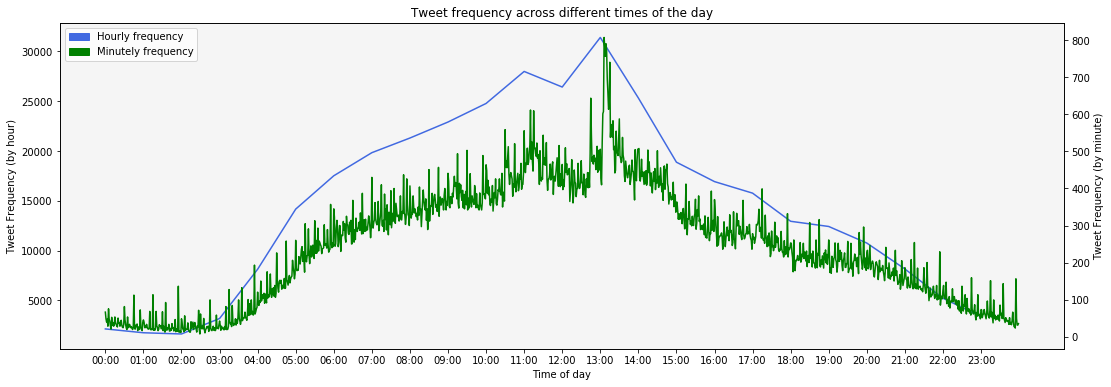

In [13]:
# Group tweets by the time of day they were tweeted
df_man['time_temp'] = [i.time() for i in df_man['date']]
volume_time = df_man.groupby('time_temp').size()

# CAN POTENTIALLY DO THIS FOR JUST THE PROTEST DATES
# Create a list of the hourly count of tweets over the entire date range
hourly_count = []
freq = 0
for time, frequency in zip(volume_time.index, volume_time):
    freq += frequency
    if time.minute == 59:
        hourly_count.append(freq)
        freq = 0

# Create a simple list of date time objects for every hour
hour_list = []
for hour in range(24):
    hour_list.append(dt.time(hour, 0, 0))
    
fig, ax = plt.subplots(figsize=(18, 6))    

ax.plot(hour_list, hourly_count, 'royalblue')
ax.set_xlabel("Time of day")
ax.set_ylabel("Tweet Frequency (by hour)")
ax.set_title("Tweet frequency across different times of the day")
ax.set_facecolor('whitesmoke')
ax.set_label('Minutely frequency')


ax2 = ax.twinx()
ax2.plot(volume_time, 'g')
ax2.set_ylabel('Tweet Frequency (by minute)')
ax2.set_xticks([dt.time(hour, 0, 0) for hour in range(24)])

green_patch = mpatches.Patch(color='g', label='Minutely frequency')
r_blue_patch = mpatches.Patch(color='royalblue', label='Hourly frequency')
plt.legend(handles=[r_blue_patch, green_patch], loc = 'upper left')

plt.show()

Obvious spike around midday which is when most of the protests occur. Blue hourly plot corresponds to y-axis on the left side and gives a better idea of the shape. It's clear tweets spike around midday - i.e. protest time. POTENTIALLY INCLUDE A RANDOM SAMPLE OF TWEETS HERE 

In [14]:
# Ensure the two dataframes are the same 
# display(df.head(3))
# display(df_man.head(3))
# df.equals(df_man) 

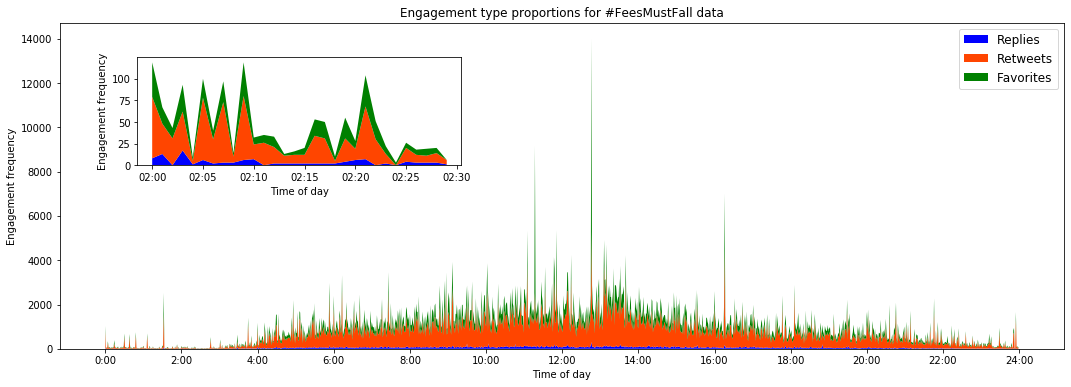

In [15]:
engage = df_man.groupby('time_temp')['replies', 'retweets', 'favorites'].sum()


# bins = range(24*60+1)
labs = ['Replies', 'Retweets', 'Favorites']
plt.figure(figsize=(18,6))
plt.stackplot(engage.index, engage['replies'], engage['retweets'], engage['favorites'], 
              labels = labs, colors = ['blue', 'orangered', 'green'])
plt.legend(fontsize = 12)
plt.xticks(3600*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', 
                                      '10:00', '12:00', '14:00', '16:00', 
                                      '18:00', '20:00', '22:00', '24:00'))
plt.xlabel('Time of day')
plt.ylabel('Engagement frequency')
plt.title('Engagement type proportions for #FeesMustFall data')

# Plot zoomed figure
engage_zoom = engage[2*60:2*60+30]
sub_axes = plt.axes([.185, .55, .25, .25]) # location on original graph
sub_axes.stackplot(engage_zoom.index, engage_zoom['replies'], engage_zoom['retweets'], 
              engage_zoom['favorites'], labels = labs, colors = ['blue', 'orangered', 'green'])
sub_axes.set_xticks([dt.time(2, 5*minute, 0) for minute in range(7)])
sub_axes.set_xlabel('Time of day')
sub_axes.set_ylabel('Engagement frequency')
# plt.xlim([0, dt.time(6,0,0)])

plt.show()

Above, we look at the engagement of these tweets around midday by analysing the split between likes, replies and retweets per tweet. _Replies_ are a form of __active__ engagement where the user is looking to engage in discussion whereas _likes and retweets_ function as a means to __spread a message__ or express agreement with the tweet in question. The zoomed in plot demonstrates that #FeesMustFall related tweets are predominantly engaged via retweets, even at low engagement frequency hours of the day.

Data in the second plot is taken from a sample of users who actively tweeted about #FeesMustFall. However, the data in question involves these users tweets from 6 months after the protests until 2020/01/05. This allows for meaningful engagement comparisom. Unfortunately, one requires a premium API subscription to access the reply count [(evidenced here)](https://stackoverflow.com/questions/47851662/reply-count-attribute-missing-from-tweet-object) and so replies are excluded as a metric in the second plot.

It is evident that retweets for a much smaller proportion of the engagement when the topic is not #FeesMustFall suggesting...

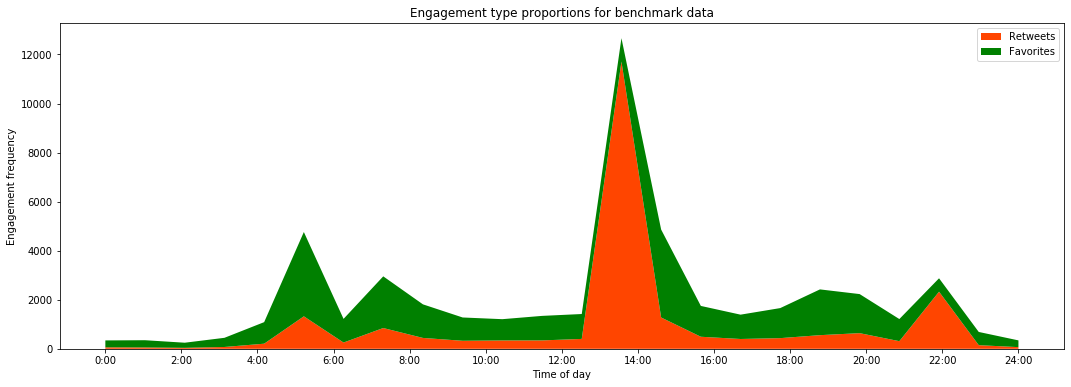

In [16]:
# Plot engagement for benchmark twitter data 
# Remove seconds - allows for better plot visualisation
df_rnd['created_at'] = df_rnd['created_at'].dt.floor('T') 
df_rnd['time_temp'] = [i.time() for i in df_rnd['created_at']]
rnd_tweets = df_rnd.groupby('time_temp')['retweets', 'favorites'].sum()
# We group the stackplot data by hour as a result of the large fluctuation in the minutely data
rnd_tweets['index'] = rnd_tweets.index
rnd_tweets['hour'] = rnd_tweets['index'].apply(lambda x: x.hour)
rnd_tweets = rnd_tweets.groupby('hour')['retweets', 'favorites'].sum()
rnd_tweets

rnd_labs = ['Retweets', 'Favorites']
plt.figure(figsize=(18,6))
plt.stackplot(rnd_tweets.index, rnd_tweets['retweets'], 
              rnd_tweets['favorites'], labels = rnd_labs,
             colors = ['orangered', 'green'])

#FIX THIS 24 HOUR GRAPH PROBLEM - you've used 0.958 to fix problem as a hack  
plt.xticks(0.958*np.arange(0, 26, 2), ('0:00', '2:00', '4:00', '6:00', '8:00', 
                                      '10:00', '12:00', '14:00', '16:00', 
                                      '18:00', '20:00', '22:00', '24:00'))

plt.legend()
plt.xlabel('Time of day')
plt.ylabel('Engagement frequency')
plt.title('Engagement type proportions for benchmark data')

plt.show()

### Network analysis

We proceed to analyse interactions and influential users and communities by analysing the Twitter data. Using the ntwrk data, we calculate the following key statistics within the network:
1. __Total nodes and egdes:__ in the network to give an idea of the scope of users and interconnectedness between them
2. __Information on the degree of notable nodes:__ the degree refers to the number of edges a particular node has 
3. __Number of connected components in the graph:__ this refers to the number of subgraphs in which a path exists between every node 
4. __Largest subgraph:__ we focus on analysing the largest connected subgraph
5. __Clustering and transitivity:__ these are both measures of the degree to which nodes tend to cluster together and hence are useful for determining whether users create tightly-knit groups. Clustering places high emphasis on low-degree nodes whereas transitivity emphasises the lower degree nodes. More information on these measures can be found [here](https://en.wikipedia.org/wiki/Clustering_coefficient) ADD IN ANALYSIS: The clustering co-efficient is larger suggesting that there is some tendency for the high degree nodes to form small clusters.

To best visualise the network structure, we depict the network of the largest connected subgraph. This gives us insight into the interactions between the most active users during the #FeesMustFall campaign.

In [115]:
# Perform network analysis on #FeesMustFall users
 
# Create graph by adding edges from ntwrk
G = nx.Graph()

for node_1, node_2 in ntwrk:
    G.add_edge(node_1, node_2, weight=1)
    
print("The graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
degrees = [val for (node, val) in G.degree()]
# The degree of a node is how many nodes it is connected to
# Max degree of graph is how many connections the node with the most connections has
# CREATE A TABLE IN PYTHON WITH THE INFO BELOW
print("Max degree of graph is", np.max(degrees))   
print("Min degree of graph is", np.min(degrees))
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")
print(nx.is_connected(G)) # graph isn't connected
print(nx.number_connected_components(G), "connected components")
largest_subgraph = max(nx.connected_component_subgraphs(G), key=len)
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the Graph")

print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

# Block of code below took 4 hours to run 
print(f"The diameter of our Graph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes is {nx.average_shortest_path_length(largest_subgraph):.2f}")
# The diameter of our Graph is 18
# The average distance between any two nodes is 4.66

graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")
# the node with id eNCA has a degree centrality of 0.05 which is the maximum of the Graph
# the node with id eNCA has a closeness centrality of 0.35 which is the maximum of the Graph
# the node with id eNCA has a betweenness centrality of 0.16 which is the maximum of the Graph
# Took 24 hours to run above code


The graph has 56522 nodes with 112011 edges
Max degree of graph is 2577
Min degree of graph is 1
The average degree of the nodes in the Graph is 4.0
The most frequent degree of the nodes found in the Graph is 1
False
3177 connected components
There are 49292 nodes and 107940 edges present in the largest component of the Graph
the node with id eNCA has a degree centrality of 0.05 which is the maximum of the Graph
the node with id eNCA has a closeness centrality of 0.35 which is the maximum of the Graph
the node with id eNCA has a betweenness centrality of 0.16 which is the maximum of the Graph


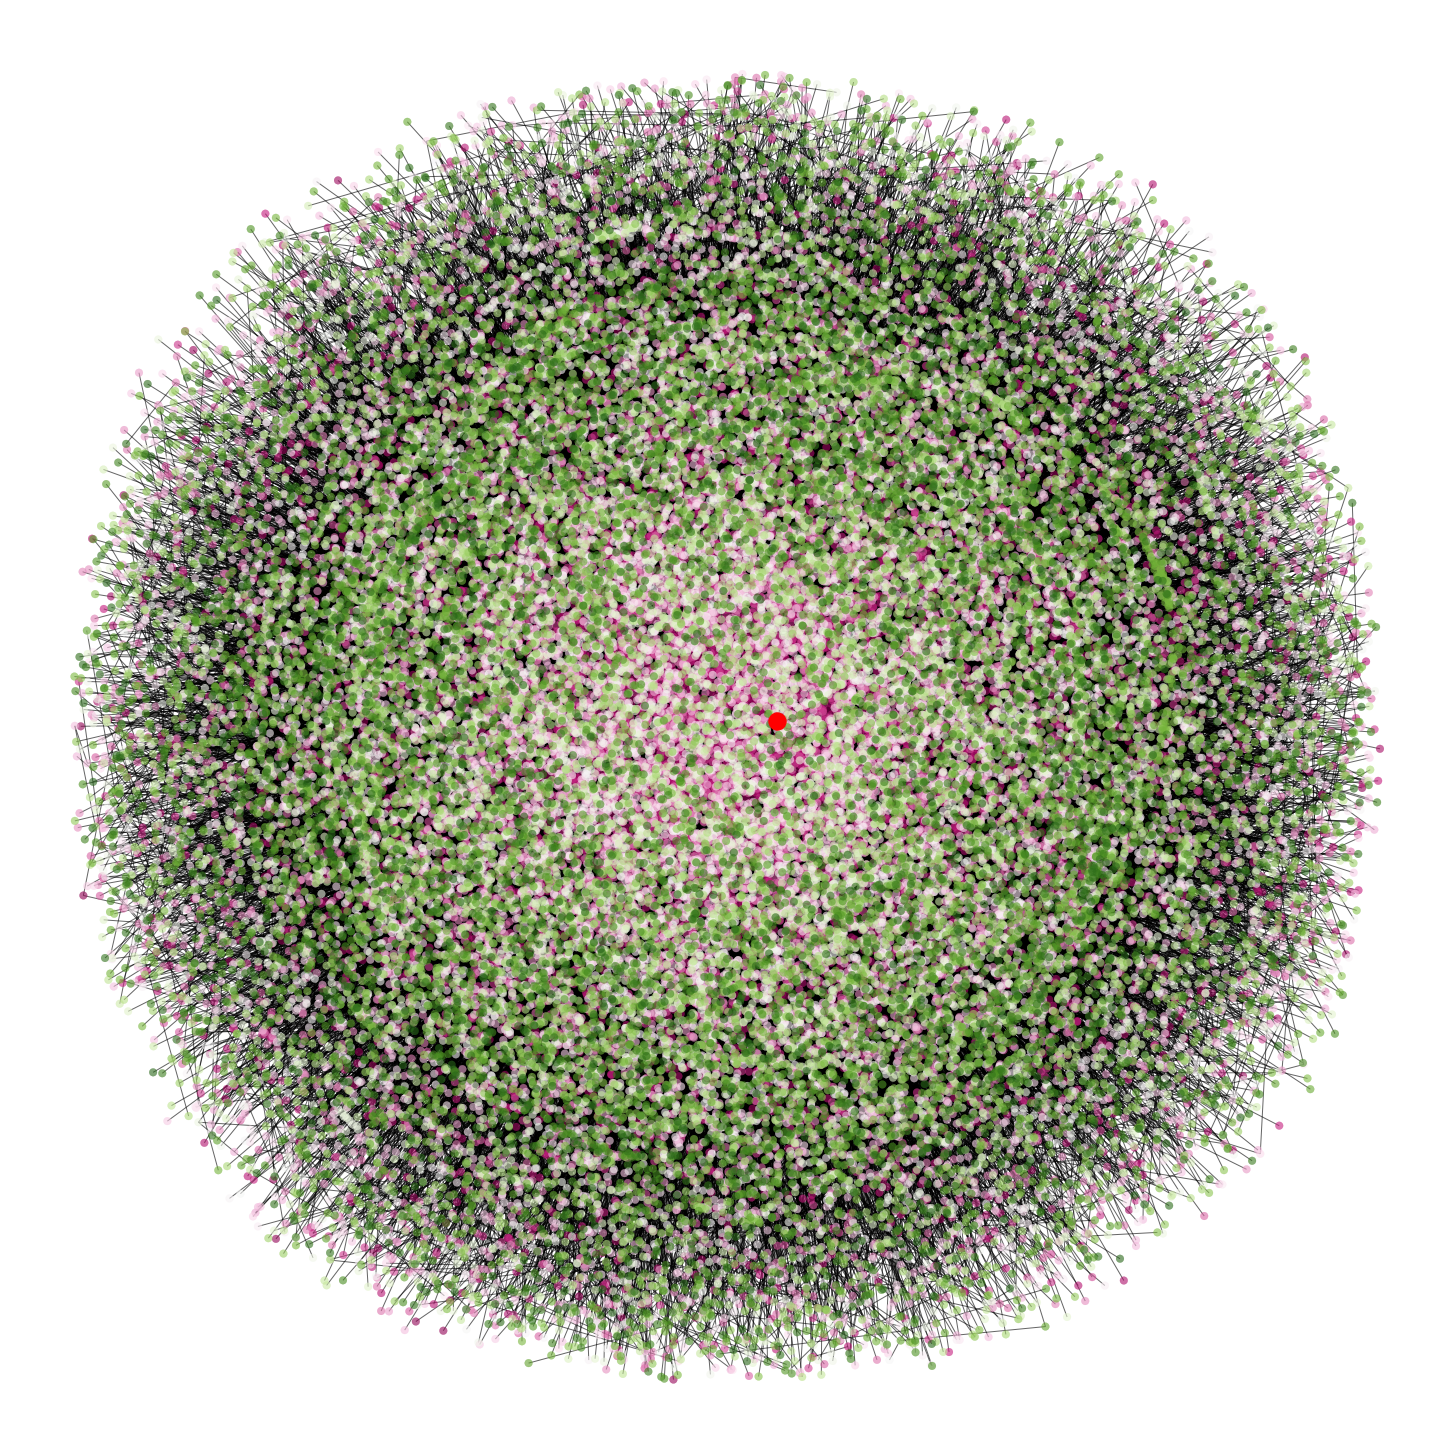

<Figure size 432x288 with 0 Axes>

In [136]:
# Position nodes using Fruchterman-Reingold force-directed algorithm.

node_and_degree = largest_subgraph.degree()
colors_central_node = ['red']
central_nodes = ['eNCA']

pos = nx.spring_layout(largest_subgraph, k=0.05)
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(largest_subgraph.number_of_nodes()), 
        cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, 
        with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, 
                       node_color=colors_central_node)
plt.show()
plt.savefig("graph.pdf")

# NBNBNB CONSIDER ADDING NODES THAT ARE USERNAMES THAT HAVE INTERACTED WITH NOBODY BUT HAVE MANY FOLLOWERS
# AND HAVE TWEETED

In [26]:
# Perform network analysis on #FeesMustFall users

# import dash
# import dash_html_components as html
# import dash_core_components as dcc
# from dash.dependencies import Input, Output
# import plotly.graph_objs as go


 
# Create graph by adding edges from ntwrk
G2 = nx.Graph()

count = 0
for node_1, node_2 in ntwrk:
    G2.add_edge(node_1, node_2, weight=1)
    if count == 150:
        break
    count+=1
    
print("The graph has %d nodes with %d edges" % (nx.number_of_nodes(G2), nx.number_of_edges(G2)))

pos = nx.layout.spring_layout(G2)

#Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G2.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Electric',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Number of Node Connections',
            xanchor='left',
            titleside='right'
        ),  
        line=dict(width=2)))
for node in G2.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
#add color to node points
for node, adjacencies in enumerate(G2.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = 'Name: ' + str(adjacencies[0]) + '<br># of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
         layout=go.Layout(
            title='Network graph displaying...',
            titlefont=dict(size=16),
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            annotations=[ dict(
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002 ) ],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig

The graph has 184 nodes with 151 edges


### Analyse hashtags in text


## Conclusion

### Positive externalities/side achievements
1. No annual increase in fees
2. Increased scholarships from the public and private sector
3. Reformation of NSFAS (National Student Financial Aid Scheme)

In [70]:
cnt = 0
for edge in nx.random_geometric_graph(200, 0.125).edges():
    print(nx.random_geometric_graph(200, 0.125).nodes[edge[0]])
    if cnt == 2:
        break
    cnt+=1
    
# pd.options.display.max_colwidth = 50 # Display all the text within the column

{'pos': [0.9540610096692811, 0.5402397164758724]}
{'pos': [0.9536338326931564, 0.42270361207762064]}
{'pos': [0.6591899885692579, 0.7374495957382541]}
